Chapter 05

# 比较超几何分布和二项分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码比较了不同总体数量 \(N\) 下超几何分布和二项分布的概率质量函数 (PMF)，以展示在有限总体的抽样情况下，超几何分布如何接近于二项分布。当总体数量 \(N\) 较大时，超几何分布的 PMF 更接近于二项分布的 PMF。代码中设定了总体中特定种类（如兔子）的比例 \(p=0.3\)，并固定抽样数量 \(n=20\)，通过循环不同的 \(N\) 值计算并绘制两种分布的 PMF。

超几何分布的 PMF 公式为：
$$
P(X = x) = \frac{\binom{K}{x} \binom{N - K}{n - x}}{\binom{N}{n}}
$$

二项分布的 PMF 公式为：
$$
P(X = x) = \binom{n}{x} p^x (1 - p)^{n - x}
$$


In [1]:
from scipy.stats import hypergeom, binom
import matplotlib.pyplot as plt
import numpy as np

## 设置总体中特定种类的比例

In [2]:
p = 0.3 # 总体中兔子的比例

## 比较不同N值下超几何分布和二项分布的PMF

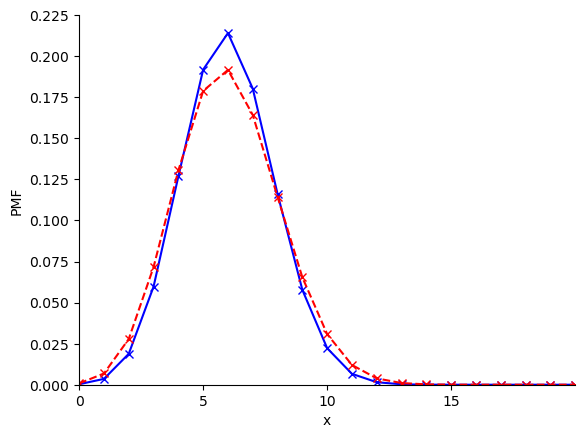

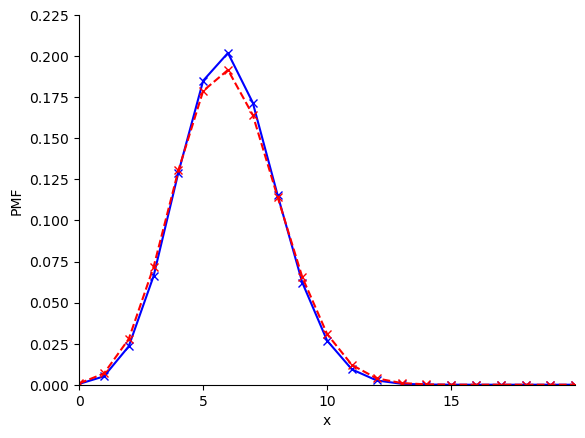

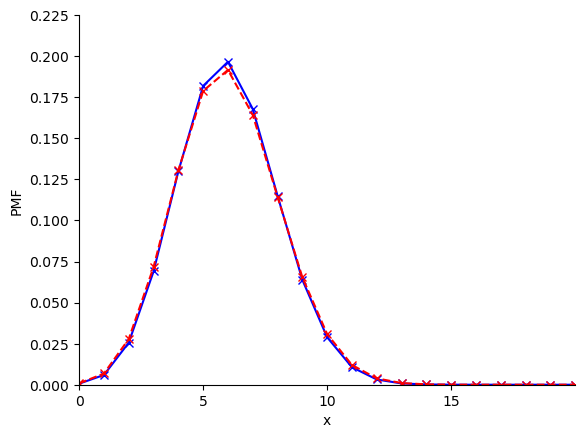

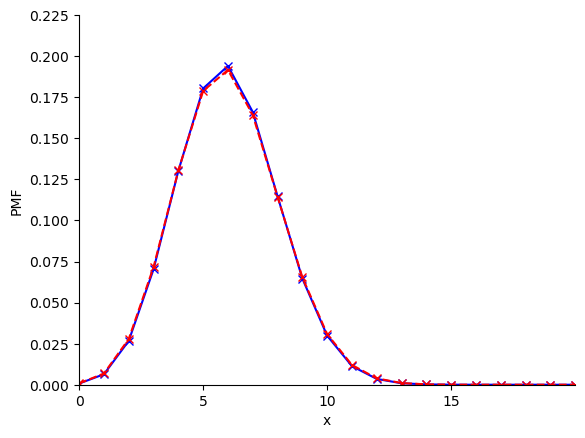

In [3]:
# 遍历不同的N值（总动物数）
for N in [100, 200, 400, 800]:
    
    K = N * p # 计算总体中特定种类数量（兔子数）
    n = 20    # 抽样数量为20，抽样不放回
    
    hyper_g = hypergeom(N, K, n) # 定义超几何分布
    x_array = np.arange(np.maximum(0, n + K - N), np.minimum(K, n) + 1) # 计算可能的x取值范围
    
    pmf_binom = binom.pmf(x_array, n, p) # 计算二项分布的PMF
    pmf_hyper_g = hyper_g.pmf(x_array)   # 计算超几何分布的PMF
    
    fig, ax = plt.subplots() # 创建绘图窗口
    
    plt.plot(x_array, pmf_hyper_g, '-bx') # 绘制超几何分布的PMF曲线
    plt.plot(x_array, pmf_binom, '--rx')  # 绘制二项分布的PMF曲线
    
    plt.xlabel('x') # 设置x轴标签
    plt.ylabel('PMF') # 设置y轴标签
    plt.gca().spines['right'].set_visible(False) # 隐藏右边框
    plt.gca().spines['top'].set_visible(False) # 隐藏上边框
    plt.gca().yaxis.set_ticks_position('left') # y轴刻度在左侧
    plt.gca().xaxis.set_ticks_position('bottom') # x轴刻度在底部
    plt.xlim(x_array.min(), x_array.max()) # 设置x轴范围
    plt.ylim(0, 0.225) # 设置y轴范围
    plt.xticks([0, 5, 10, 15]) # 设置x轴刻度